# PME3481 - Controle e Aplicações

## Simulações Dinâmicas não Lineares

In [13]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt

In [14]:
Xcm = 1.052
Xpe = 0.261
L = 3.304
Df = 0.127
Tlin = 230.57
Izz = 15.07
M = 23.545
g = 9.8055
dar = 1.091
Cd = 0.432
Vxlin = -10.0

u = [213, 0]

In [15]:
def response(t, z, u):
    Vx, Vy, Theta, Thetap = z
    
    dVx = 1/M * (
        -M * g * np.cos(Theta) 
        + u[0] * np.cos(u[1]) 
        - 0.5 * dar * Cd * (np.pi * (Df/2)**2 * np.sin(Theta) + Df * L * np.cos(Theta)) * np.sin(Theta) * Vy**2 
        + 0.5 * dar * Cd * (np.pi * (Df/2)**2 * np.cos(Theta) + Df * L * np.sqrt(np.sin(Theta)**2)) * (np.cos(Theta) * Vx - Vy * np.sin(Theta))**2 * np.cos(Theta)
    )
    
    dVy = 1/M * (
        -M * g * np.sin(Theta) 
        - u[0] * np.sin(u[1]) 
        - 0.5 * dar * Cd * (np.pi * (Df/2)**2 * np.sin(Theta) + Df * L * np.cos(Theta)) * np.cos(Theta) * Vy**2 
        + 0.5 * dar * Cd * (np.pi * (Df/2)**2 * np.cos(Theta) + Df * L * np.sqrt(np.sin(Theta)**2)) * (np.cos(Theta) * Vx - Vy * np.sin(Theta))**2 * np.sin(Theta)
    )

    dTheta = Thetap
    
    dThetap = 1/Izz * (
        -u[0] * Xcm * np.sin(u[1]) 
        - 0.5 * dar * Cd * Xpe * (np.pi * (Df/2)**2 * np.sin(Theta) + Df * L * np.cos(Theta)) * np.cos(Theta) * Vy**2 
        + 0.5 * dar * Cd * (np.pi * (Df/2)**2 * np.cos(Theta) + Df * L * np.sqrt(np.sin(Theta)**2)) * (np.cos(Theta) * Vx - Vy * np.sin(Theta))**2 * Xpe * np.sin(Theta)
    )

    return [dVx, dVy, dTheta, dThetap]


In [20]:
# Condições iniciais para o cenário C1
z0 = [-10, 0, -0.01, 1]

# Parâmetros de controle
u = [1.0, 0.0] 

# Tempo de simulação
t_span = [0, 10]  # de 0 a 30 segundos

# Resolução do sistema de equações diferenciais
solution = solve_ivp(lambda t, z: response(t, z, u), t_span, z0, method='RK23', t_eval=np.linspace(t_span[0], t_span[1], 1000))


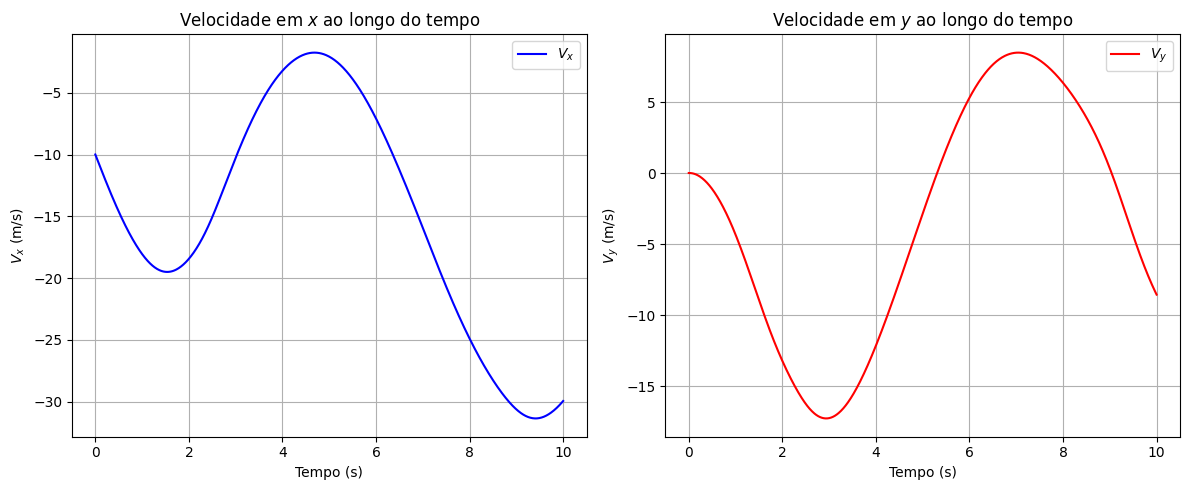

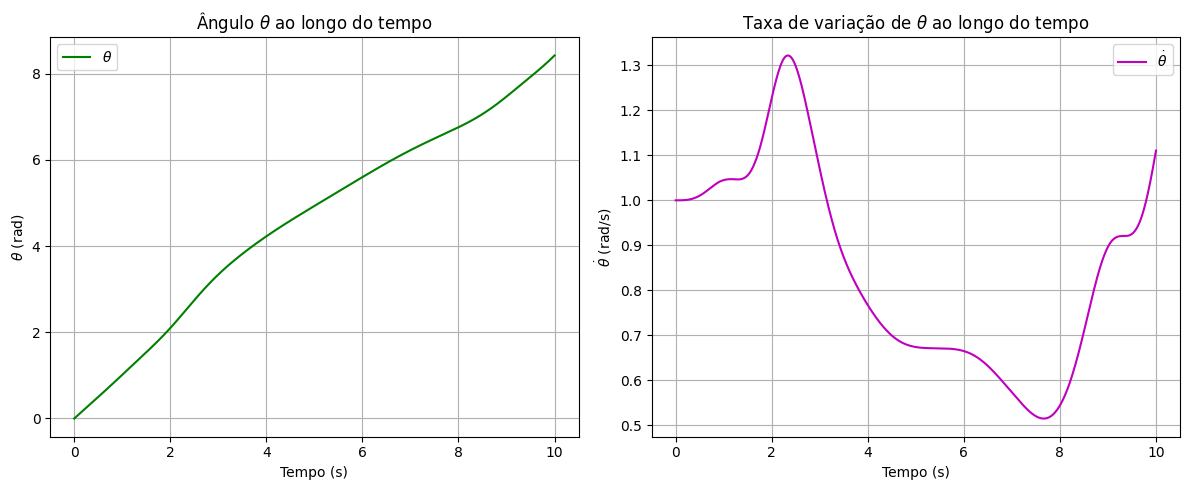

In [21]:
# Gráfico Vx e Vy lado a lado
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(solution.t, solution.y[0], label='$V_x$', color='b')
plt.xlabel('Tempo (s)')
plt.ylabel('$V_x$ (m/s)')
plt.title('Velocidade em $x$ ao longo do tempo')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(solution.t, solution.y[1], label='$V_y$', color='r')
plt.xlabel('Tempo (s)')
plt.ylabel('$V_y$ (m/s)')
plt.title('Velocidade em $y$ ao longo do tempo')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Gráfico Theta e Theta_p lado a lado
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(solution.t, solution.y[2], label='$\\theta$', color='g')
plt.xlabel('Tempo (s)')
plt.ylabel('$\\theta$ (rad)')
plt.title('Ângulo $\\theta$ ao longo do tempo')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(solution.t, solution.y[3], label='$\\dot{\\theta}$', color='m')
plt.xlabel('Tempo (s)')
plt.ylabel('$\\dot{\\theta}$ (rad/s)')
plt.title('Taxa de variação de $\\theta$ ao longo do tempo')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()